# ELECTRIC VEHICLES: A MARKET SIZE EXPLORATION

### Introduction

Commonly hailed as eco-friendly and technologically advanced, electric vehicles are rapidly ushering in the latest revolution in transportation with ultimate regard to sustainability worldwide.

Market size analysis is an important part of market research since it indicates the potential sales volume in a specific market. It enables firms to comprehend the volume of demand, analyze market saturation levels, and find development prospects.


The Process involved in this analysis includes:
- *defining the market scope*
- *gathering and preparing data*
- *analytical modelling*
- *conveying findings through visualisation and reporting*

### Key Metrics:

1. EV Adoption Over Time.
2. Geographical Distribution.
3. EV Types.
4. Make & Model Popularity.
5. Electric range analysis.
6. Market Size Estimation.

### Data Source

The data used for this analysis was gotten from __[here](https://catalog.data.gov/dataset/electric-vehicle-population-data)__

In [3]:
# importing relevant python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Loading dataset into pandas dataframe
ev_data = pd.read_csv(r"C:\Users\user\Documents\Python Project\Electric_Vehicle_Dataset.csv")

In [5]:
# view ev_data
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJSA1E65N     Yakima    Granger    WA      98932.0        2022  TESLA   
1  KNDC3DLC5N     Yakima     Yakima    WA      98902.0        2022    KIA   
2  5YJYGDEEXL  Snohomish    Everett    WA      98208.0        2020  TESLA   
3  3C3CFFGE1G     Yakima     Yakima    WA      98908.0        2016   FIAT   
4  KNDCC3LD5K     Kitsap  Bremerton    WA      98312.0        2019    KIA   

     Model                   Electric Vehicle Type  \
0  MODEL S          Battery Electric Vehicle (BEV)   
1      EV6          Battery Electric Vehicle (BEV)   
2  MODEL Y          Battery Electric Vehicle (BEV)   
3      500          Battery Electric Vehicle (BEV)   
4     NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0  Eligibility unknown as battery range has not b...             0.0   
1  Eligibility unknown as battery range has not b...             0.0

In [6]:
# Data cleaning
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [7]:
# Data cleaning contd..
# Check for missing values
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64

In [8]:
# Drop rows with missing values.

ev_data = ev_data.dropna()

In [9]:
# Check the data types of the columns
print(ev_data.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [10]:
# Remove rows where Model Year is 2026
ev_data = ev_data[ev_data['Model Year'] != 2026]

In [11]:
# Convert 'Model Year' to string type
ev_data['Model Year'] = ev_data['Model Year'].astype(str)

# Check the data types again
print(ev_data.dtypes)


VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                            object
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [12]:
# Check information about the dataset
print(ev_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 247858 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247858 non-null  object 
 1   County                                             247858 non-null  object 
 2   City                                               247858 non-null  object 
 3   State                                              247858 non-null  object 
 4   Postal Code                                        247858 non-null  float64
 5   Model Year                                         247858 non-null  object 
 6   Make                                               247858 non-null  object 
 7   Model                                              247858 non-null  object 
 8   Electric Vehicle Type                              247858 non-null  object 
 9 

In [13]:
# Checking for null entries
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [14]:
# Check for duplicate entries
print(ev_data.duplicated().sum())

0


In [15]:
# Check the shape of the dataset
print(ev_data.shape)

# Display the first few rows of the cleaned dataset
print(ev_data.head())

(247858, 17)
   VIN (1-10)     County       City State  Postal Code Model Year   Make  \
0  5YJSA1E65N     Yakima    Granger    WA      98932.0       2022  TESLA   
1  KNDC3DLC5N     Yakima     Yakima    WA      98902.0       2022    KIA   
2  5YJYGDEEXL  Snohomish    Everett    WA      98208.0       2020  TESLA   
3  3C3CFFGE1G     Yakima     Yakima    WA      98908.0       2016   FIAT   
4  KNDCC3LD5K     Kitsap  Bremerton    WA      98312.0       2019    KIA   

     Model                   Electric Vehicle Type  \
0  MODEL S          Battery Electric Vehicle (BEV)   
1      EV6          Battery Electric Vehicle (BEV)   
2  MODEL Y          Battery Electric Vehicle (BEV)   
3      500          Battery Electric Vehicle (BEV)   
4     NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0  Eligibility unknown as battery range has not b...             0.0   
1  Eligibility unknown as battery range has not b...         

<b>Electriic Vehicle Adoption Over time</b>

C:\Users\user\AppData\Local\Temp\ipykernel_11184\3378226713.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=yearly_ev_adoption.index, y=yearly_ev_adoption.values, palette="viridis")


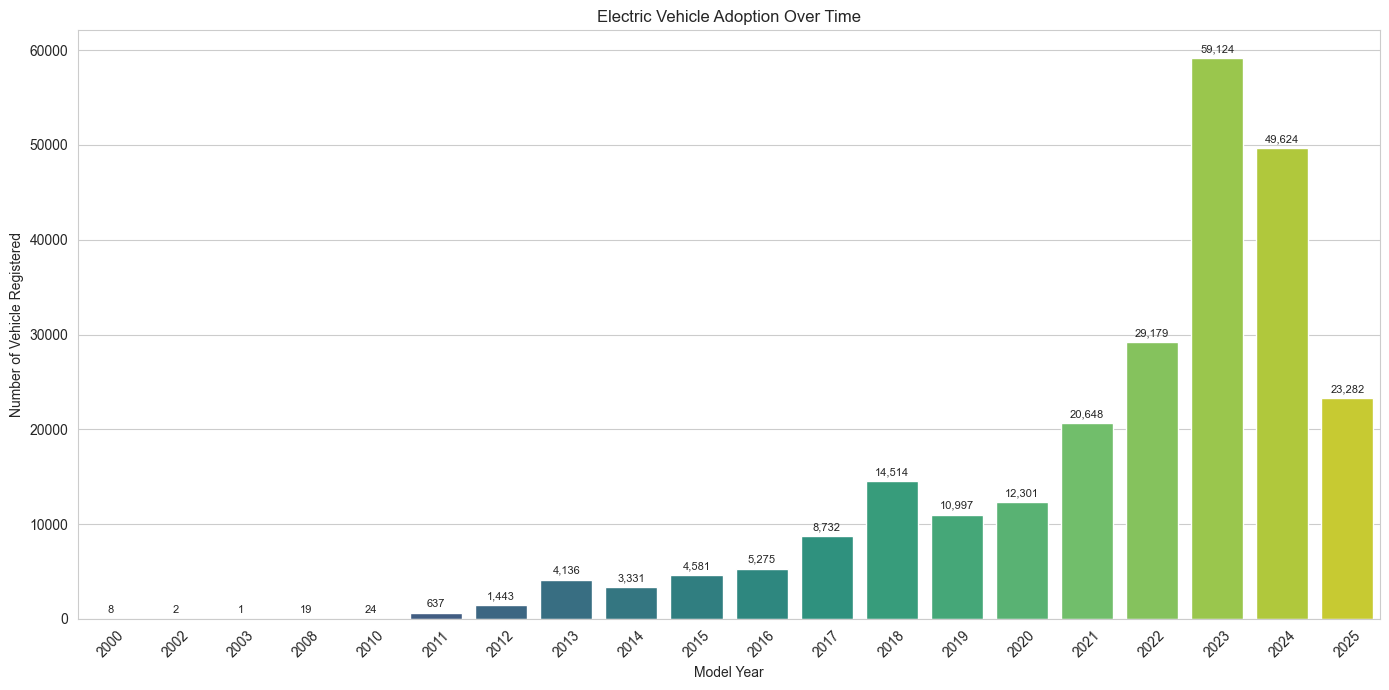

In [16]:
import seaborn as sns
sns.set_style("whitegrid")

# Electric vehicle adoption over time
plt.figure(figsize=(14, 7))
yearly_ev_adoption = ev_data["Model Year"].value_counts().sort_index()
barplot = sns.barplot(x=yearly_ev_adoption.index, y=yearly_ev_adoption.values, palette="viridis")
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=8, padding=3)
plt.title("Electric Vehicle Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicle Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above barchart shows that the adoption of electric vehicles became noticeaable from the year 2011. Since then, the adoption of electric vehicles has increased significantly. There was a steady increase from 2011 to 2018, before a slight fall between 2019-2020. From 2021, the adoption of electric vehicles increased rapidly reaching its peak at 2023 (about 58,000) number of vehicle registered. A fall in the adoption was observed between 2023 and 2024 with a decrease of about 25%. This may be attributed to the hash economic situation experienced. The data for 2025 has just come in as as the day of analysis.

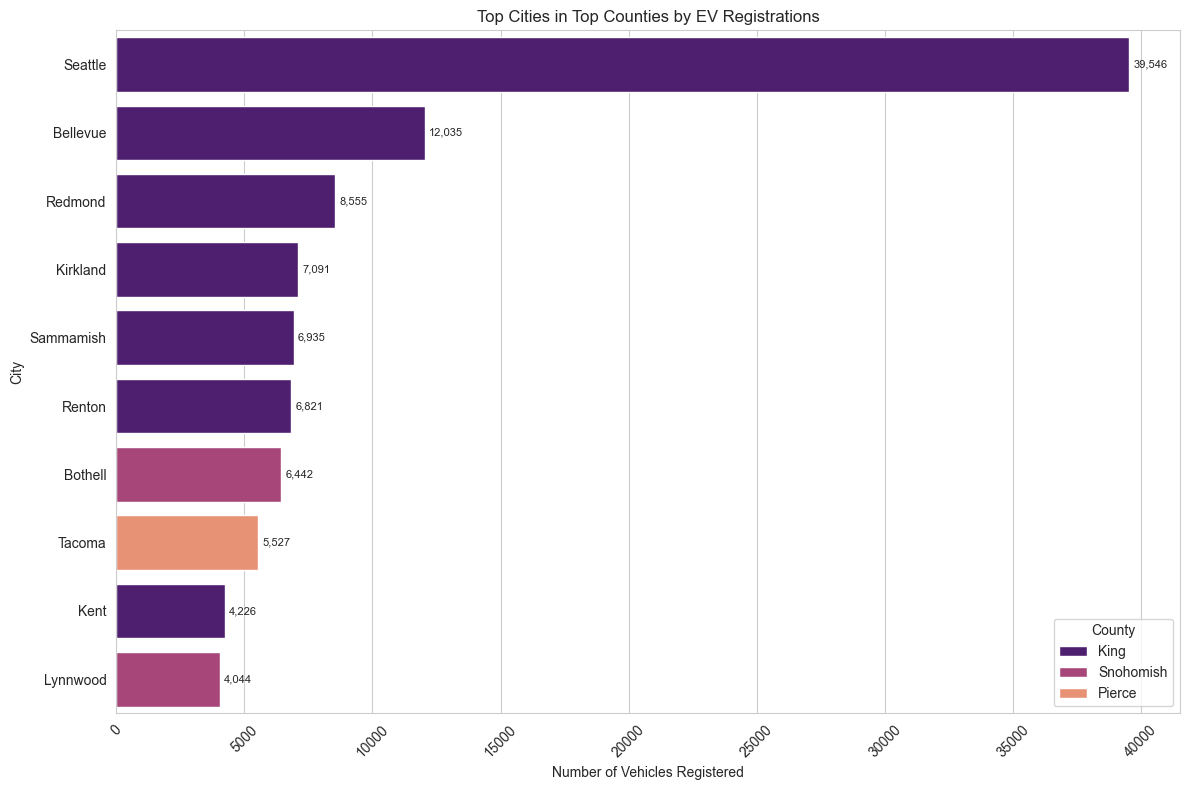

In [17]:
# Top 3 County Distribution
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=8, padding=3)

plt.xticks(rotation=45)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above graph shows that the top 3 counties based on electric vehicle registration are KIng, Snohomish, and Pierce counties. Seatle city which is in King county has the highest number of electric vehicle registration followed by Bellevue and Redmond respectively taking the 2nd and 3rd ranking. This graph also shows that the registration of electric vehicles is not uniform across all Counties.

### Electric Vehicle Types
_This will give insight on the user preference of electric vehicles_

C:\Users\user\AppData\Local\Temp\ipykernel_11184\3634646527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="magma")


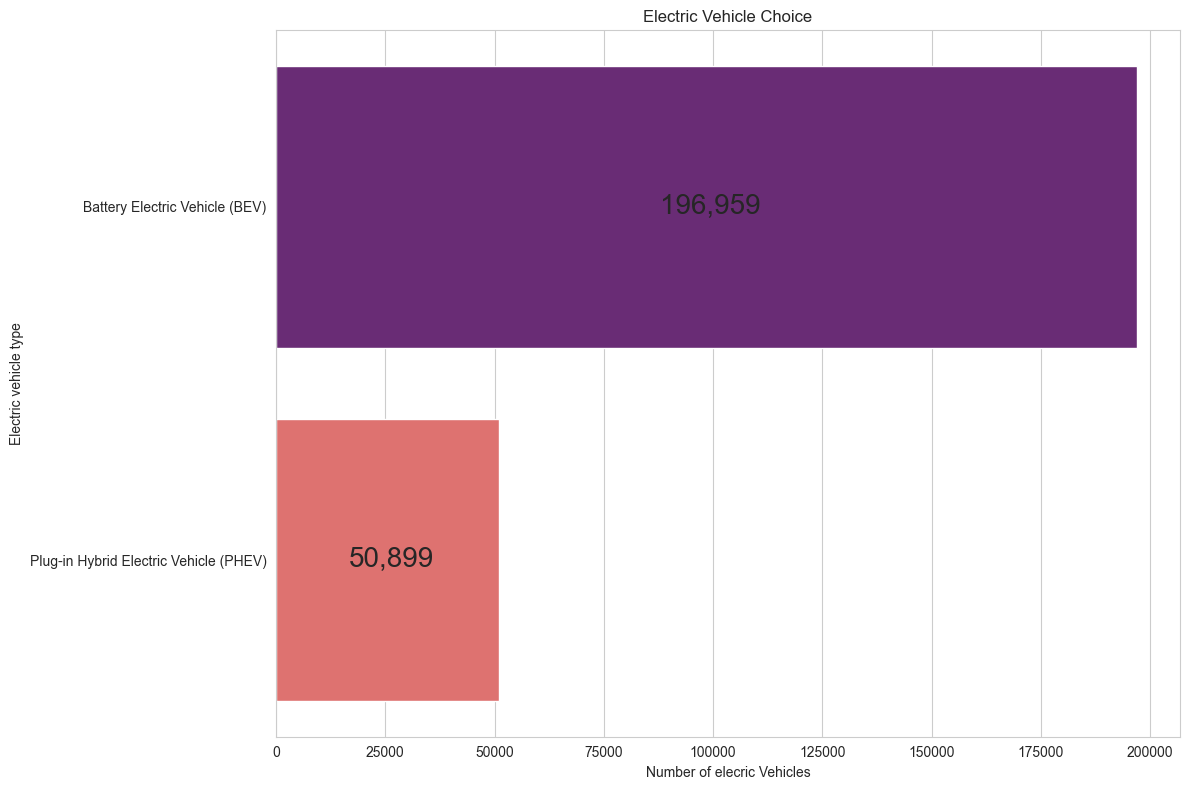

In [18]:
# electric vehicle type distriibution
ev_type_distribution = ev_data["Electric Vehicle Type"].value_counts()

# graph of electric vehicle type distribution
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="magma")
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='center', fontsize=20, padding=3)
plt.title("Electric Vehicle Choice")
plt.xlabel("Number of elecric Vehicles")
plt.ylabel("Electric vehicle type")
plt.tight_layout()
plt.show()

The graph above clearly shows the usage of two (2) type of electric vehicles, _viz:_ <br>1. Battery Electric Vehicle</br>2. Plug-in Hybrid Electric vehicle. <br>From the graph above, it's evident that users of electric vehicles prefers the <b>_"Battery Electric Vehicle"_</b> type to the <b>_"Plug-in Hybrid Electric Vehicle_</b> type</br>

### Make and Model Popularity
This analysis will help Identify the top players in the electric vehicle market, potentially indicating consumer preference, brand loyalty, and success of manufacturers promotion strategy.

#### Make Popularity

C:\Users\user\AppData\Local\Temp\ipykernel_11184\3211194607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=ev_make.values, y=ev_make.index, palette="cubehelix",)


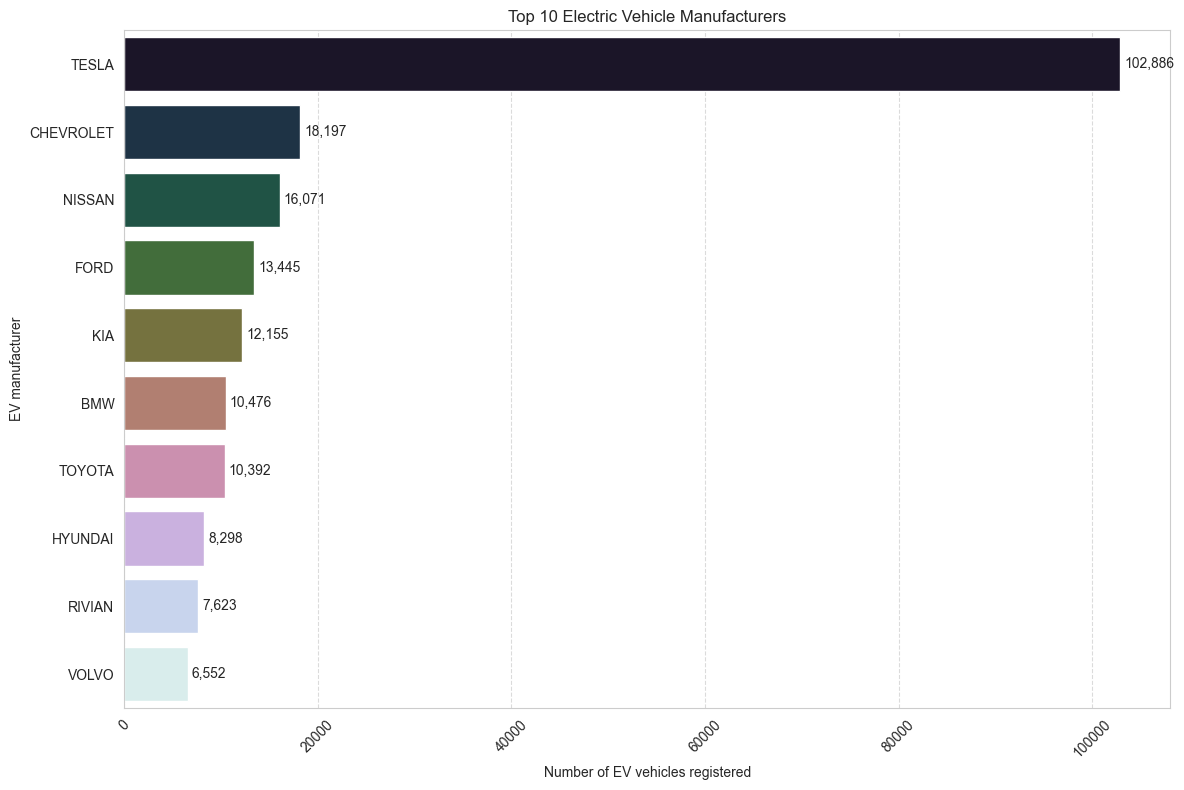

In [19]:
#Electric vehicle make popularity
ev_make = ev_data["Make"].value_counts().head(10) #Top 10

# graph of electric vehicle make
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=ev_make.values, y=ev_make.index, palette="cubehelix",)
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=3)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.title("Top 10 Electric Vehicle Manufacturers")
plt.xlabel("Number of EV vehicles registered")
plt.ylabel("EV manufacturer")
plt.tight_layout()
plt.show()

The graph above shows that:<br>
<b>TESLA</b> is the top player (1st position) in the EV market space by a wide margin as the most popular manufacturer<br>
<b>CHEVROLET</b> is the second most popular manufacturer (2nd position) in EV market space, closely follwed by <b>NISSAN</b> at the 3rd position.<br>
FORD, KOA, BMW, TOYOTA, HYUNDAI, RIVAN, VOLKSWAGEN, JEEP, and HYUNDAI follows in a decreasing order of popularity.

#### Model Popularity

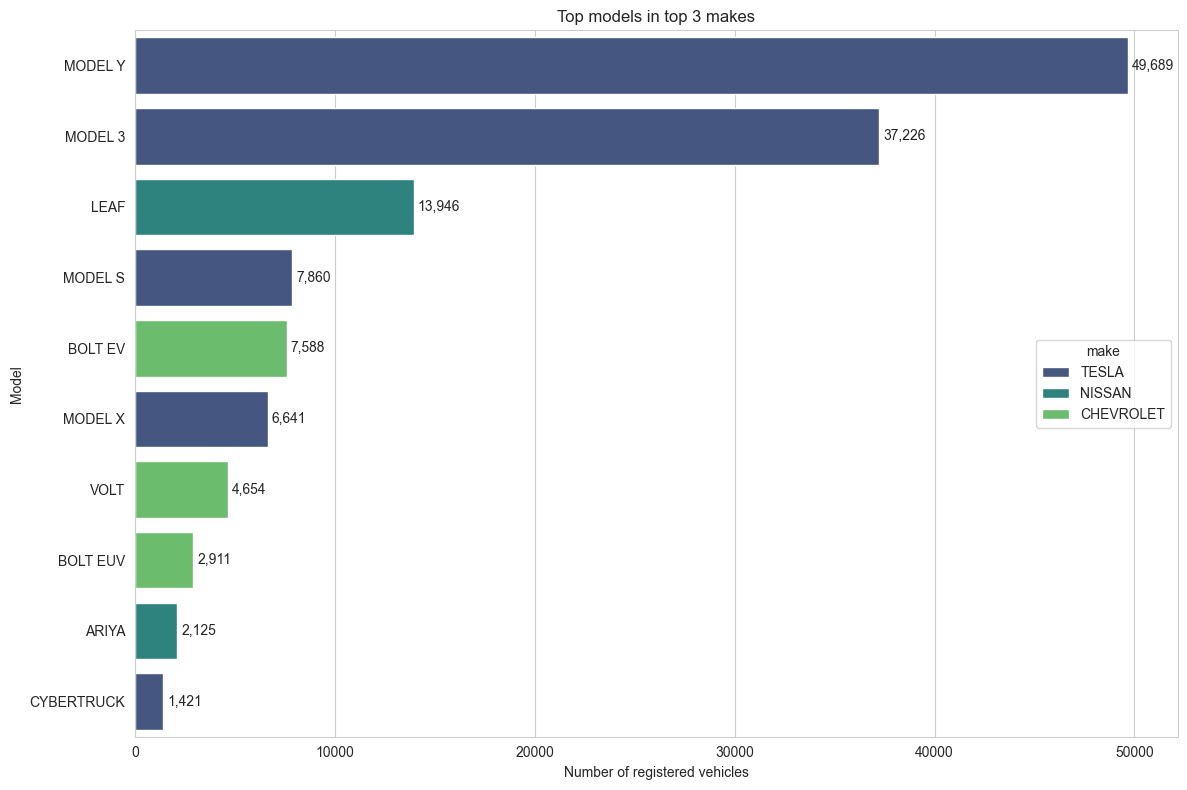

In [20]:
# Selecting the top 3 manufacturers
top_3_makes = ev_make.head(3).index

# Filter dataset for these top 3 manufacturers
top_makes_data = ev_data[ev_data["Make"].isin(top_3_makes)]

#Popularity of Models in top 3 manufacturer
ev_model_top_makes = top_makes_data.groupby(["Make", "Model"]).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

# Top 10 Model across these manufacturers
top_models = ev_model_top_makes.head(10) # for clarity

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Number of Vehicles", y="Model", hue="Make", data=top_models, palette="viridis")
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=3)
plt.title("Top models in top 3 makes")
plt.xlabel("Number of registered vehicles")
plt.ylabel("Model")
plt.legend(title="make", loc="center right")
plt.tight_layout()
plt.show()

As already acertained in the previous graph, this present graph claerly shows that TESLA rules the electric vehicle race.<br>
<b>TESLA's MODEL Y</b> and <b>MODEL 3</b> are the most registered electric vehicles, with MODEL Y having the highest number of registration. <br>
<b>NISSAN's LEAF</b> is the third most registered electric vehicle model<br>
<b>NISSAN's ARIYA</b> is the fourth electric vehicle model in terms of number of registration <br>

Distribution of Electric Vehichle Ranges

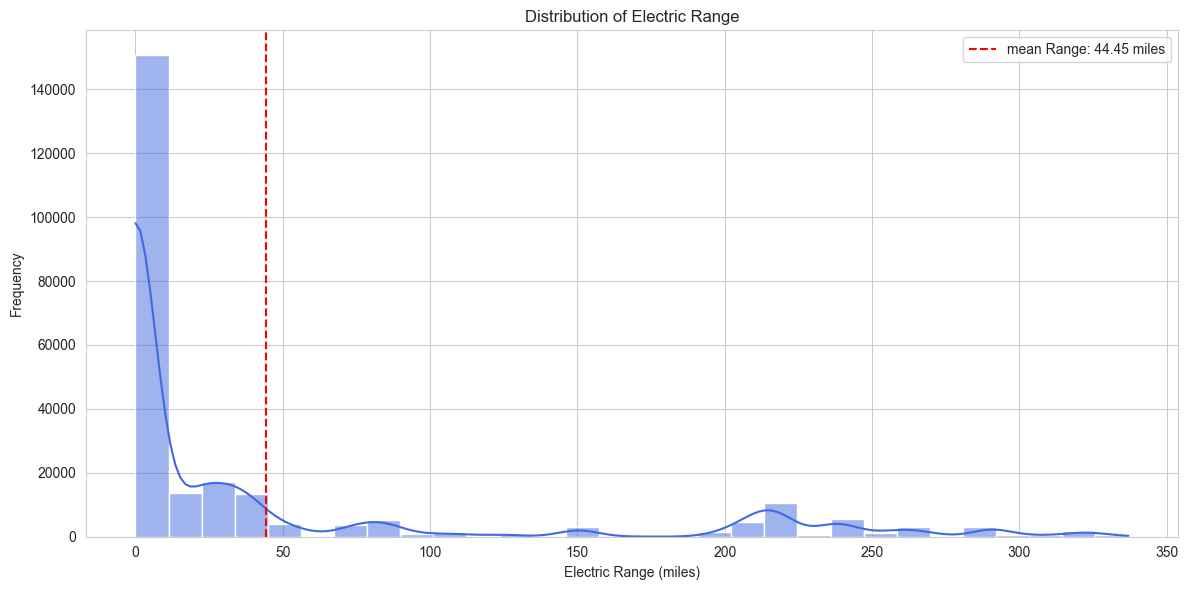

In [24]:
# Analyzing the distribution of electric ranges
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Frequency")
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.tight_layout()
plt.show()

<b>key observations from the graph:</b>
- High frequency of vehicles with low eletric range
- The distribution is skewed to the left because majority of electric vehicles have low eletric ranges below the mean (44.45 miles)
- Although majority of the EVs are low-ranged vehicles, there are a few that are high-ranged even close to 350 miles

Eletric Ranges Per Model Year

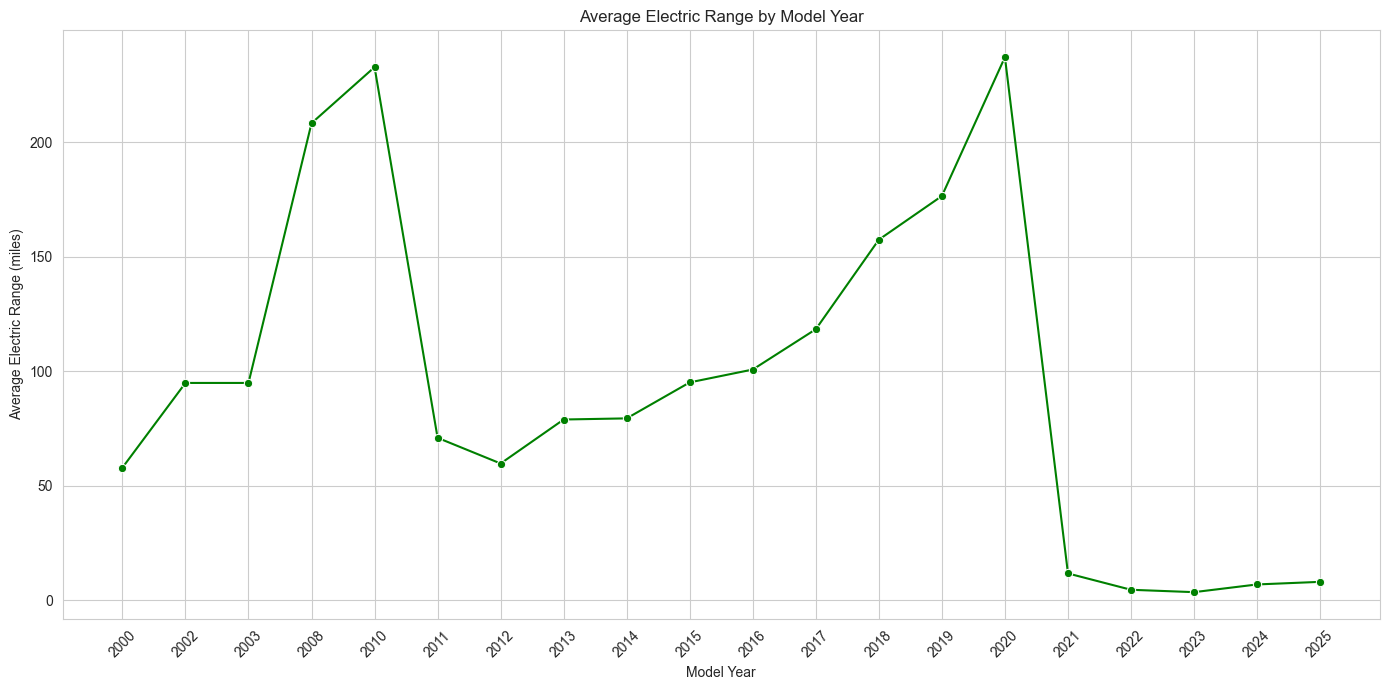

In [ ]:
# Average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_range_by_year, x='Model Year', y='Electric Range', marker='o', color='green')
plt.title("Average Electric Range by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Electric Range (miles)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The graph above shows tha there was a significant approache in increasing the eletric range of EVs from 2011 to 2020 with the highest occuring in 2020. After the year 2020, there was a significant drop in eletric ranges which might indicate that EV manufacturing companies started focusing on other parameters orther than eletric range of the EV thereby introducing more low range EVs. This observable low-range EVs might be the introduction of several EV charging outlets.

<b>Electric range among top Manufacturers</b>

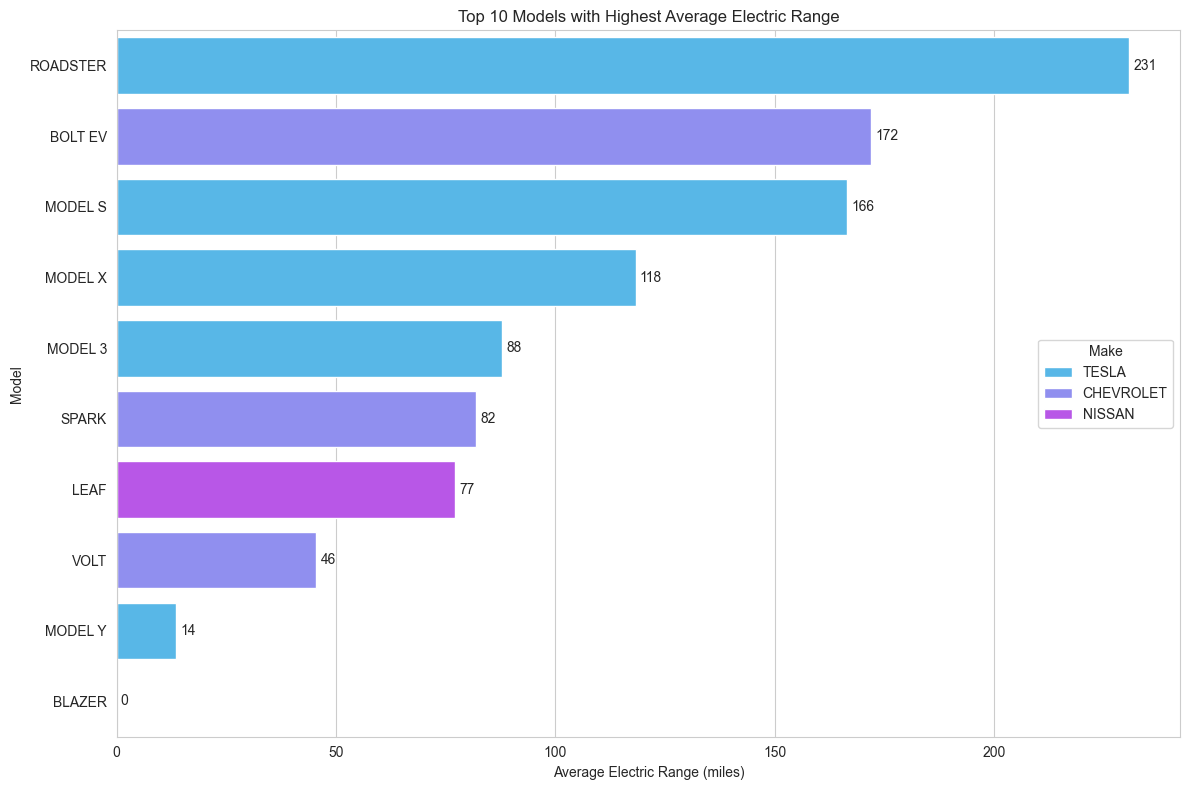

In [36]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Top 10 model with the highest average electric range
top_10_models_range = average_range_by_model.head(10)
plt.figure(figsize=(12, 8))
barplot=sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_10_models_range, palette='cool')
for container in barplot.containers:
    plt.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=3)
plt.title("Top 10 Models with Highest Average Electric Range")
plt.xlabel("Average Electric Range (miles)")
plt.ylabel("Model")
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The graph below shows that TESLA's <b>ROADSTER</b> has the highest average electric range of 231 miles, followed by CHEVROLET's <b>BOLT EV</b> with an average electric range of 172 miles. TESLA's <b>MODEL S</b>, <b>MODEL X</b>, and <b>MODEL 3</b> followed each other with 166, 188, and 88 miles repectively. In summary, we can see that TESLA's brands occupy the top positions on average electric range. This means that on average, TESLA EVs have higher electric ranges compared to other EVs

Electric Vehicle Popularity Over Time

<Figure size 1200x600 with 0 Axes>

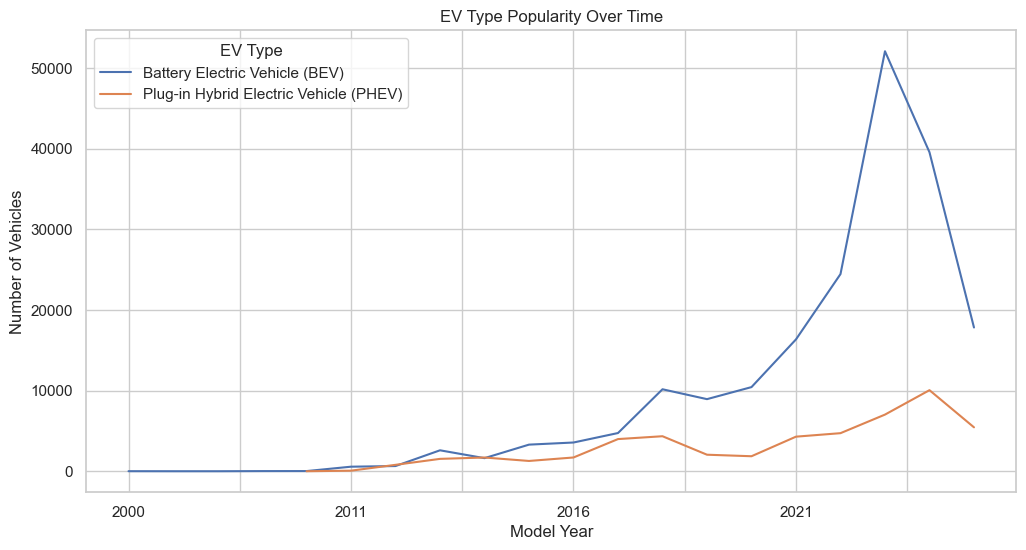

In [60]:
# Analyzing Electric Vehicle Type Trends Over Time
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ev_type_trend = ev_data.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack()
ev_type_trend.plot(kind='line', figsize=(12, 6))
plt.title("EV Type Popularity Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.legend(title="EV Type")
plt.show()

<h1> Market Size Analysis</h1>

In [38]:
# Number or EVs per registraion year
ev_registration_year = ev_data['Model Year'].value_counts().sort_index()
print(ev_registration_year)

Model Year
2000        8
2002        2
2003        1
2008       19
2010       24
2011      637
2012     1443
2013     4136
2014     3331
2015     4581
2016     5275
2017     8732
2018    14514
2019    10997
2020    12301
2021    20648
2022    29179
2023    59124
2024    49624
2025    23282
Name: count, dtype: int64


Calculate Compound Annual Growth Rate (CAGR)

In [44]:
from scipy.optimize import curve_fit
import numpy as np

# Filter dataset with complete data assuming 2024 is complete, removing 2025 and 2026
filtered_data = ev_registration_year[ev_registration_year.index.astype(int) <= 2024]

# Ensure the index is converted to integers
filtered_data.index = filtered_data.index.astype(int)

# Define a linear function for curve fitting
def linear_func(x, a, b):
    return a * np.exp(b * x)

# Prepare data for curve fitting
x_data = filtered_data.index - filtered_data.index.min()  # Subtract the minimum year
y_data = filtered_data.values

# Fit the curve
params, covariance = curve_fit(linear_func, x_data, y_data)

# Forecast number of EVs for 2025 and the next 5 years
future_years = np.arange(2025, 2025 + 6) - filtered_data.index.min()
future_ev_counts = linear_func(future_years, *params)

# Display forecasted values in a dictionary
forecasted_ev_counts = dict(zip(future_years + filtered_data.index.min(), future_ev_counts))

print("Forecasted EV counts for 2025 to 2030:")
for year, count in forecasted_ev_counts.items():
    print(f"{year}: {int(count)}")

Forecasted EV counts for 2025 to 2030:
2025: 76328
2026: 101838
2027: 135873
2028: 181282
2029: 241867
2030: 322701


Plotting Market Size Data

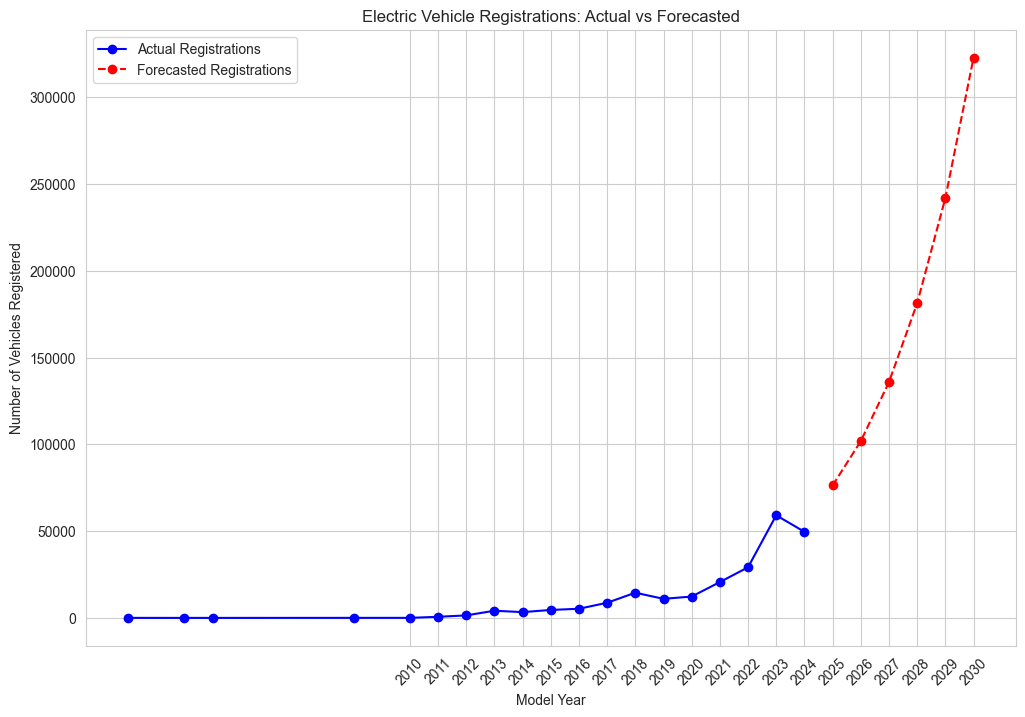

In [49]:
# Prepare data for plotting
years = np.arange(filtered_data.index.min(), 2030 + 1)
actual_years = filtered_data.index
forecast_year_full = np.arange(2025, 2030 + 1)

# Actual and forcasted values
actual_values = filtered_data.values
forcasted_values_full = [forecasted_ev_counts[year] for year in forecast_year_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_year_full, forcasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title("Electric Vehicle Registrations: Actual vs Forecasted")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.xticks(np.arange(2010, 2031, 1), rotation=45)
plt.legend()

plt.show()

From this graph, the EV market is expected to rise as per the forcast data